<a href="https://colab.research.google.com/github/Tannu-22/GradientDescent/blob/main/GD_1DFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applying LR on placement data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [6]:
df.shape

(200, 2)

In [7]:
X=df.iloc[:,:1]
Y=df.iloc[:,1:]

In [11]:
X.shape

(200, 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2)

In [17]:
Y_train.shape

(160, 1)

In [18]:
Y_test.shape

(40, 1)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [20]:
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lr.predict(X_test)

In [22]:
lr.predict(X_test[:1])

array([[3.89111601]])

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(Y_test,lr.predict(X_test))

0.780730147510384

In [32]:
mylabel=print(lr.coef_,"*X +",lr.intercept_)

[[0.55795197]] *X + [-0.89611192]


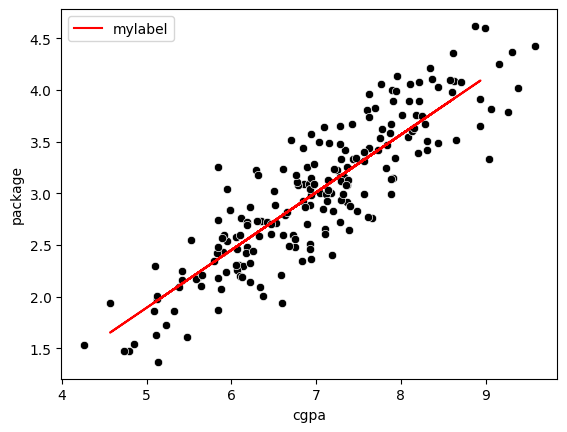

In [38]:
sns.scatterplot(data=df,x='cgpa',y='package',color='black')
plt.plot(X_test,lr.predict(X_test),color='red',label="mylabel")
plt.legend()
plt.show()

# Apply GD on Placement data

In [39]:
x_train=X_train.values

In [ ]:
x_train

In [41]:
x_test=X_test.values

In [42]:
y_train=Y_train.values
y_test=Y_test.values

In [91]:
class myGD:

  def __init__(self,learning_rate=0.001,no_of_epochs=50):
    self.m=0
    self.c=0
    self.lr=learning_rate
    self.epoch=no_of_epochs

  def fit(self,x_train,y_train):
     
    for i in range(self.epoch):

      y_hat=self.c+self.m*x_train
      der_c=-2*np.mean(y_train-y_hat)
      der_m=-2*np.mean( (y_train-y_hat)*x_train)
    
      self.c=self.c-(self.lr*der_c)
      self.m=self.m-(self.lr*der_m)

    print("slope is ",self.m)
    print("Intercept is ",self.c)
  
  def predict(self,x_test):
    return (self.m*x_test+self.c)

In [92]:
obj=myGD(0.01,7000)

In [93]:
obj.fit(x_train,y_train)

slope is  0.5520176192643921
Intercept is  -0.8536875852602833


In [95]:
r2_score(y_test,obj.predict(x_test))


0.7790947846432895

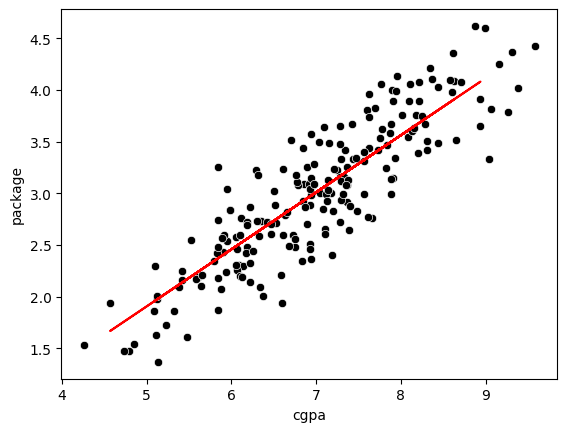

In [99]:
sns.scatterplot(data=df,x='cgpa',y='package',color='black')
plt.plot(x_test,obj.predict(x_test),color='red')
plt.show()

#Best Fit line by both methods

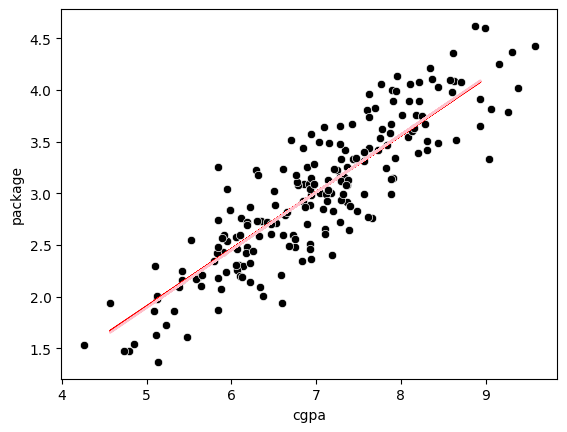

In [101]:
sns.scatterplot(data=df,x='cgpa',y='package',color='black')
plt.plot(x_test,obj.predict(x_test),color='red')
plt.plot(X_test,lr.predict(X_test),color='pink')
plt.show()